In [1]:
from matplotlib import pyplot as plt
%matplotlib notebook

import numpy as np

<IPython.core.display.Javascript object>


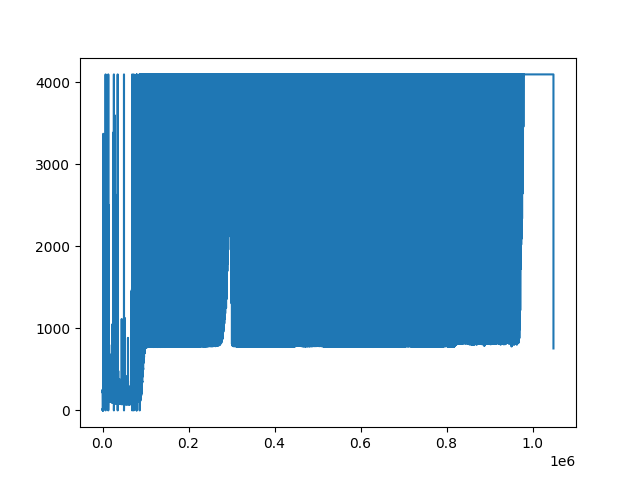

In [156]:
dat = []
with open("resp.dat", 'r') as f:
  for l in f:
    dat.append(int(l))

frame = []
for i in range(1480, (len(dat)//2)*2, 2):
    frame.append((dat[i+1] << 8 | dat[i]) & 0b111111111111)

plt.figure()
plt.plot(frame)
plt.show()

In [103]:
for i in range(0, 50000, 100):
    print(bin(dat[i+1])[2:].zfill(10), bin(dat[i])[2:].zfill(10))

0111100000 0000000000
0111100000 0000000000
0111100000 0000111101
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0001000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000000000
0111100000 0000001010
0111100000 0000000000
0111100000 0010010101
0111100000 0000000000
0111100010 0000111000
0111100000 0000111110
0111100000 0000000000
0111100000 0000011101
0111100000 0000000000
0111100000 0000011011
0111100000 0000000000
0111100000 0000001001
0111100000 0000000000
0111100000 0000000000
0111100000 0000001011
0111100000 0000000000
0111100000

In [5]:
print(len(frame))
for i in range(0, len(frame), 10000):
    print(i, frame[i])

1048757
0 964
10000 894
20000 678
30000 715
40000 551
50000 657
60000 725
70000 468
80000 482
90000 317
100000 463
110000 478
120000 262
130000 109
140000 206
150000 65
160000 161
170000 32
180000 185
190000 115
200000 63
210000 48
220000 59
230000 69
240000 140
250000 197
260000 34
270000 146
280000 23
290000 254
300000 154
310000 289
320000 464
330000 471
340000 455
350000 346
360000 501
370000 731
380000 721
390000 681
400000 571
410000 729
420000 882
430000 824
440000 957
450000 788
460000 898
470000 981
480000 774
490000 811
500000 817
510000 793
520000 778
530000 988
540000 916
550000 792
560000 940
570000 826
580000 956
590000 673
600000 539
610000 646
620000 749
630000 545
640000 549
650000 314
660000 418
670000 259
680000 296
690000 365
700000 152
710000 29
720000 155
730000 225
740000 105
750000 227
760000 145
770000 82
780000 52
790000 43
800000 58
810000 104
820000 166
830000 2
840000 87
850000 245
860000 176
870000 74
880000 230
890000 379
900000 385
910000 350
920000 508


1022


<IPython.core.display.Javascript object>


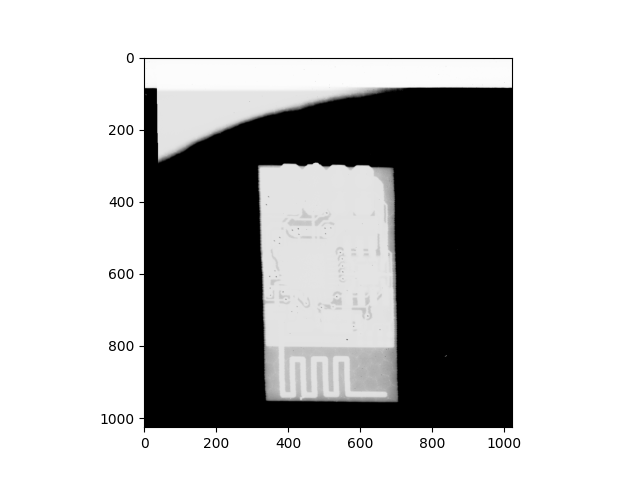

In [157]:
COLS = 1026
rows = len(frame) // COLS
print(rows)
raw_img = np.reshape(frame[:COLS*rows], (COLS, rows))

plt.figure()
plt.imshow(raw_img, cmap="Greys")
plt.show()

<IPython.core.display.Javascript object>


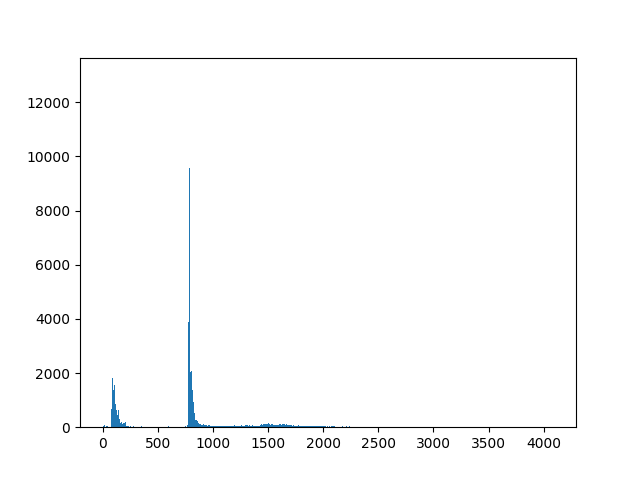

In [158]:
# Histogram
#plt.hist(frame, bins=list(range(0, 2 << 9)))

# Take out clipped
usable_frame = list(filter(lambda v: v < 4090, frame))

plt.figure()
plt.hist(usable_frame, bins=4096)
plt.show()

<IPython.core.display.Javascript object>


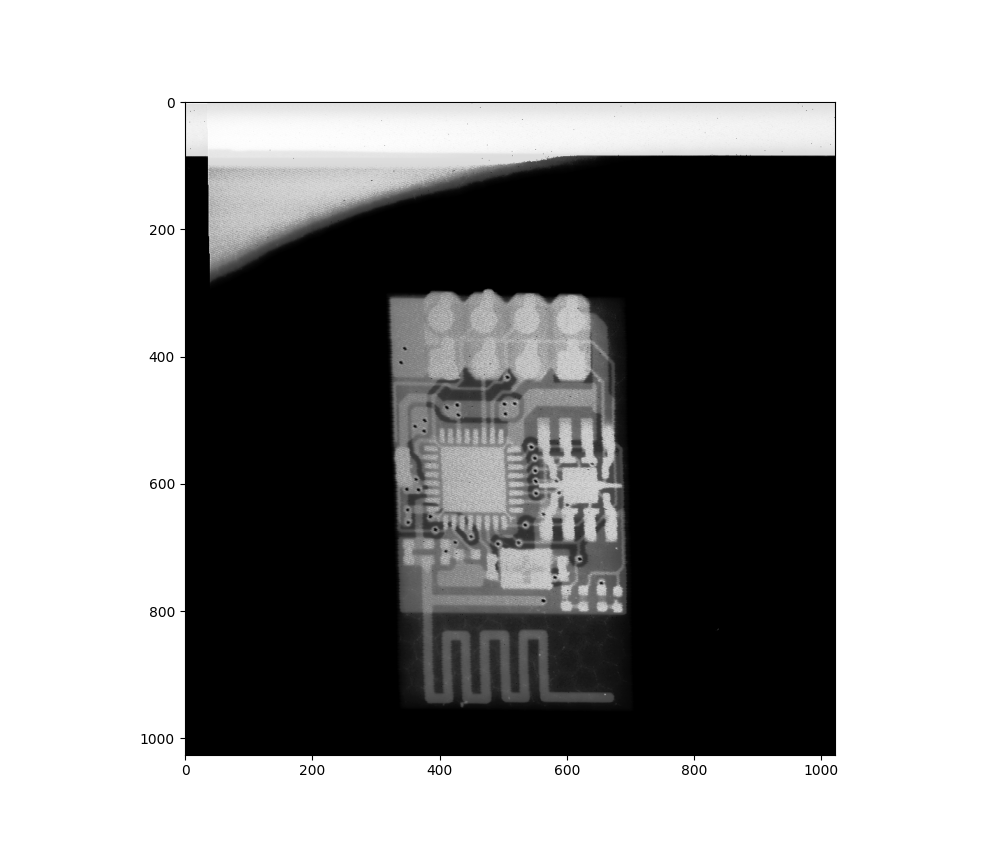

<IPython.core.display.Javascript object>


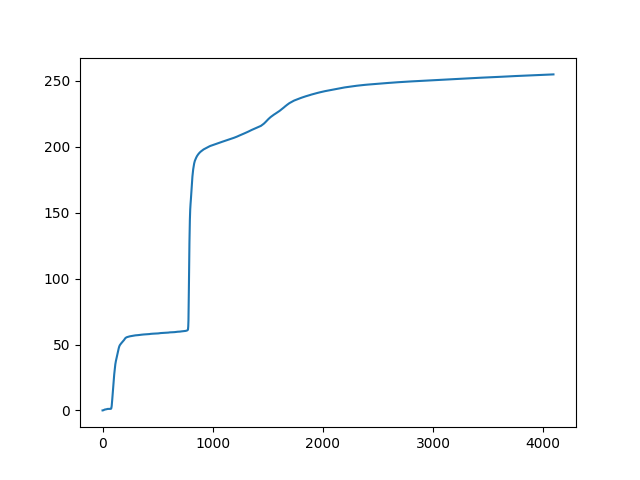

In [159]:
def image_histogram_equalization(image, number_bins=1023):
    # from http://www.janeriksolem.net/histogram-equalization-with-python-and.html
    
    # get image histogram
    image_histogram, bins = np.histogram(list(filter(lambda v: v < 4090, image.flatten())), number_bins, density=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape), cdf

eq_img, cdf = image_histogram_equalization(raw_img, number_bins=max(raw_img.flatten()))

plt.figure()
plt.imshow(eq_img, cmap="Greys")
plt.show()

plt.figure()
plt.plot(cdf)
plt.show()